In [1]:
import torch as th
import numpy as np

from sklearn.decomposition import PCA, KernelPCA

import matplotlib.pyplot as plt

In [2]:
# Import datasets

sep_data = th.load('../datasets/sep_states.pt')

ent_data = th.load('../datasets/ent_states.pt')

sep_data.shape

torch.Size([50000, 4, 4])

In [3]:
sep_data_pair = th.stack((sep_data.flatten(start_dim=1).real, sep_data.flatten(start_dim=1).imag), dim=2)
ent_data_pair = th.stack((ent_data.flatten(start_dim=1).real, ent_data.flatten(start_dim=1).imag), dim=2)

sep_data_pair.shape

torch.Size([50000, 16, 2])

In [4]:
full_data_real = th.cat([sep_data.real.flatten(start_dim=1), ent_data.real.flatten(start_dim=1)], dim=0).detach().numpy()
full_data_imag = th.cat([sep_data.imag.flatten(start_dim=1), ent_data.imag.flatten(start_dim=1)], dim=0).detach().numpy()

full_data_real.shape, full_data_imag.shape

((100000, 16), (100000, 16))

In [5]:
label_sep = th.zeros(sep_data.shape[0])
label_ent = th.ones(ent_data.shape[0])

labels = th.cat([label_sep, label_ent], dim=0).detach().numpy()

labels.shape, labels.dtype

((100000,), dtype('float32'))

In [6]:
dataset_real = np.concatenate([full_data_real, labels.reshape(-1, 1)], axis = 1)
dataset_imag = np.concatenate([full_data_imag, labels.reshape(-1, 1)], axis = 1)
dataset_real.shape

(100000, 17)

In [7]:
# randomly select 10000 samples

n_random_rows = 10000
n_features = dataset_real.shape[1] - 1

random_idx = np.random.choice(dataset_real.shape[0], n_random_rows, replace=False)

subset_real = dataset_real[random_idx, :]
subset_imag = dataset_imag[random_idx, :]

subset_real[:, 0:n_features].shape, subset_imag.shape

((10000, 16), (10000, 17))

In [12]:
pca_model = PCA()

pca_real = pca_model.fit_transform(dataset_real[:, :-1])
pca_imag = pca_model.fit_transform(dataset_imag[:, :-1])

pca_real.shape, pca_imag.shape

((100000, 16), (100000, 16))

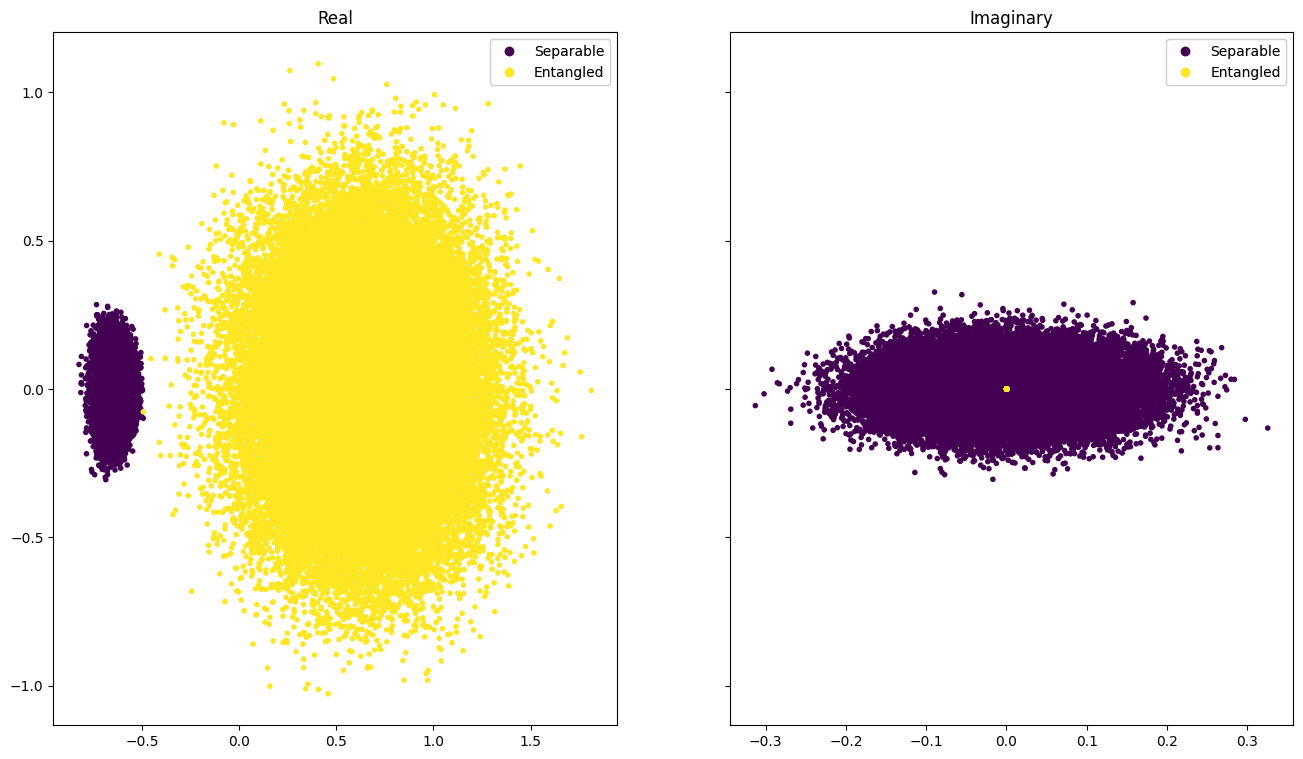

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharey=True)

scatter_real = axs[0].scatter(pca_real[:, 0], pca_real[:, 1], c = dataset_real[:, -1], marker='.')
axs[0].title.set_text('Real')
legend1 = axs[0].legend(handles=scatter_real.legend_elements()[0], labels = ["Separable", "Entangled"])
axs[0].add_artist(legend1)

scatter_imag = axs[1].scatter(pca_imag[:, 0], pca_imag[:, 1], c = dataset_imag[:, -1], marker='.')
axs[1].title.set_text('Imaginary')
legend1 = axs[1].legend(handles=scatter_imag.legend_elements()[0], labels = ["Separable", "Entangled"])
axs[1].add_artist(legend1)

# plt.savefig('../Figures/linear_PCA.png')
del fig, axs

In [26]:
exp_variance_real = pca_model.fit(dataset_real[:, :-1]).explained_variance_
exp_variance_imag = pca_model.fit(dataset_imag[:, :-1]).explained_variance_



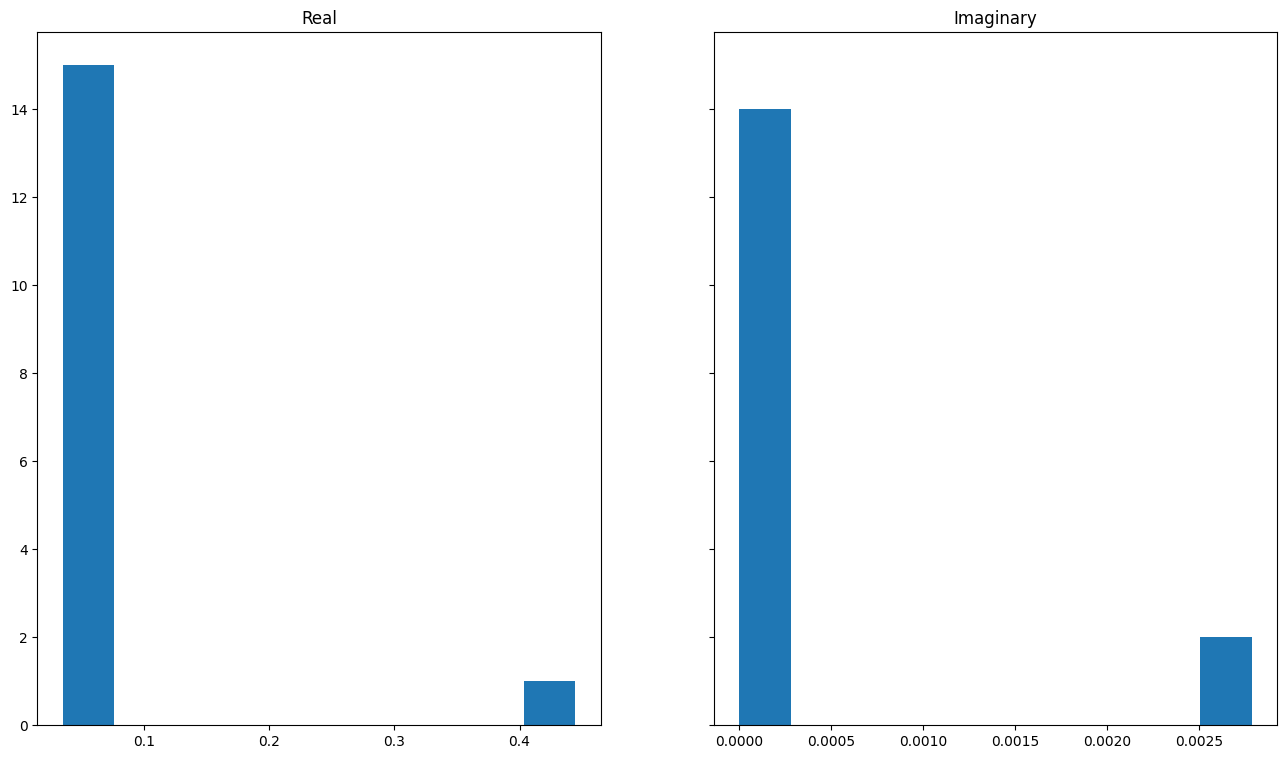

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharey=True)

axs[0].hist(exp_variance_real)
axs[0].title.set_text('Real')
axs[1].hist(exp_variance_imag)
axs[1].title.set_text('Imaginary')